In [31]:
!pip install catboost

In [32]:
from catboost import CatBoostClassifier

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np

In [34]:
hr = pd.read_csv("/content/drive/MyDrive/Cases/human-resources-analytics/HR_comma_sep.csv")
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [35]:
data_types = hr.dtypes == object
data_types[data_types == True]

Department    True
salary        True
dtype: bool

In [36]:
X = hr.drop('left', axis=1)
y = hr['left']

In [37]:
c_gbm = CatBoostClassifier(random_state=23, cat_features=['Department','salary']  )
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
print(c_gbm.get_params())

{'random_state': 23, 'cat_features': ['Department', 'salary']}


In [38]:
params={'n_estimators':[50,75,100],
        'learning_rate':np.linspace(0.001, 0.7, 5),
        'max_depth':[2, 3, 5]}
gcv = GridSearchCV(c_gbm, param_grid=params, cv=kfold,scoring='neg_log_loss')
gcv.fit(X, y)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.4281092	total: 6.65ms	remaining: 658ms
1:	learn: 0.3046490	total: 9.92ms	remaining: 486ms
2:	learn: 0.2453802	total: 13.4ms	remaining: 434ms
3:	learn: 0.2149323	total: 16.8ms	remaining: 402ms
4:	learn: 0.1924468	total: 20.1ms	remaining: 381ms
5:	learn: 0.1805959	total: 23.3ms	remaining: 365ms
6:	learn: 0.1685246	total: 26.6ms	remaining: 353ms
7:	learn: 0.1530067	total: 29.7ms	remaining: 342ms
8:	learn: 0.1474778	total: 32.8ms	remaining: 332ms
9:	learn: 0.1408877	total: 35.9ms	remaining: 323ms
10:	learn: 0.1370078	total: 38.9ms	remaining: 315ms
11:	learn: 0.1329517	total: 42.3ms	remaining: 310ms
12:	learn: 0.1271216	total: 45.4ms	remaining: 304ms
13:	learn: 0.1209359	total: 48.4ms	remaining: 297ms
14:	learn: 0.1188099	total: 51.5ms	remaining: 292ms
15:	learn: 0.1149997	total: 54.5ms	remaining: 286ms
16:	learn: 0.1115576	total: 57.6ms	remaining: 281ms
17:	learn: 0.1101527	total: 60.5ms	remaining: 276ms
18:	learn: 0.1085559	to

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f5d028a5b40>,
             param_grid={'learning_rate': array([0.001  , 0.17575, 0.3505 , 0.52525, 0.7    ]),
                         'max_depth': [2, 3, 5],
                         'n_estimators': [50, 75, 100]},
             scoring='neg_log_loss')

In [40]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.7, 'max_depth': 5, 'n_estimators': 100}
-0.07121065117148208


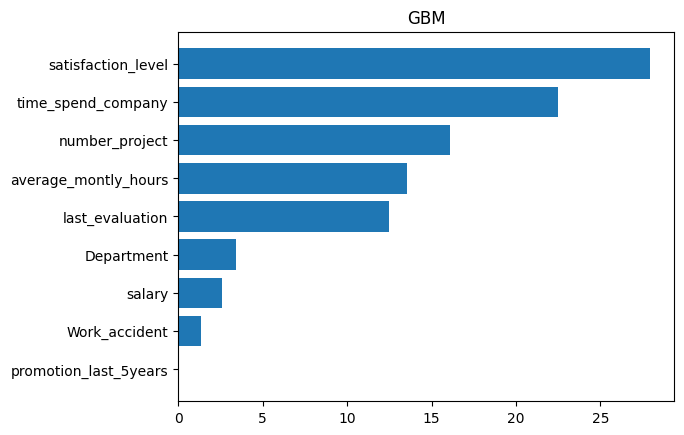

In [25]:
bm_gbm = gcv.best_estimator_
df_imp = pd.DataFrame({'Features':list(X.columns),
                       'Importance':bm_gbm.feature_importances_})
df_imp = df_imp[df_imp['Importance']>0].sort_values('Importance')
plt.barh(df_imp['Features'],df_imp['Importance'])
plt.title("GBM")
plt.show()

### Regression

In [26]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor

In [27]:
boston = pd.read_csv("/content/drive/MyDrive/Datasets/Boston.csv")
X = boston.drop('medv', axis=1)
y = boston['medv']

In [ ]:
gbm = CatBoostRegressor(random_state=23)
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
params={'n_estimators':[50,75,100],
        'learning_rate':np.linspace(0.001, 0.7, 5),
        'max_depth':[2, 3, 5]}
gcv = GridSearchCV(gbm, param_grid=params, cv=kfold)
gcv.fit(X, y)

In [29]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.17575, 'max_depth': 5, 'n_estimators': 100}
0.8809874524169409


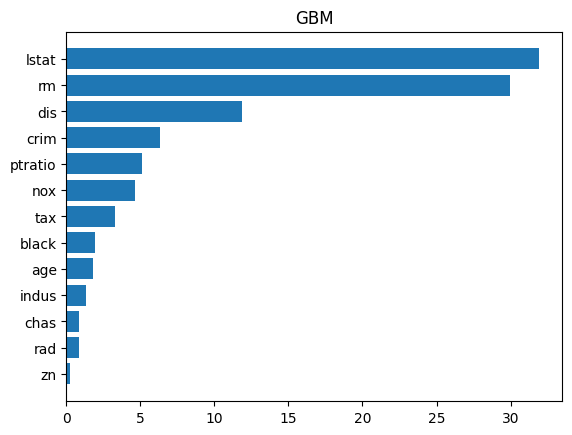

In [30]:
bm_gbm = gcv.best_estimator_
df_imp = pd.DataFrame({'Features':list(X.columns),
                       'Importance':bm_gbm.feature_importances_})
df_imp = df_imp[df_imp['Importance']>0].sort_values('Importance')
plt.barh(df_imp['Features'],df_imp['Importance'])
plt.title("GBM")
plt.show()